<a href="https://colab.research.google.com/github/GyuNyeoi/Gongmo/blob/main/Gongmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 설치 및 임포트

In [ ]:
!pip install osmnx
!pip install folium
!pip install descartes
!pip install openpyxl

In [ ]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import networkx as nx
import osmnx as ox
import openpyxl

# 최적의 자전거 보관함 위치 선정

In [ ]:
import numpy as np
from shapely.geometry import Point

def load_networkx_from_shapefiles(node_shp, link_shp):
  """
  Loads a networkx graph from node and link shapefiles.
  노드와 링크 파일로 부터 Networkx 그래프를 부르겠다.

  Args:
    node_shp: 노드 링크 파일.
    link_shp: 노드 링크 파일.

  리턴:
    NetworkX의 그래프로 반환.
  """

  # 노드와 링크의 파일을 GeoPandas로 불러오기
  nodes_df = gpd.read_file(node_shp, encoding='cp949')
  links_df = gpd.read_file(link_shp, encoding='cp949')

  # 그래프 만들기 (빈 그래프)
  graph = nx.Graph()

  # 노드를 그래프에 추가하기
  for _, row in nodes_df.iterrows():
    node_id = row['NODE_ID']
    node_geom = row['geometry']
    node_name = row['NODE_NAME']
    #node_adm = row['ADM_NM']
    #adm=node_adm
    graph.add_node(node_id, geometry=node_geom, name=node_name)

  # 엣지(링크)를 그래프에 추가하기
  for _, row in links_df.iterrows():
    start_node_id = row['F_NODE']
    end_node_id = row['T_NODE']
    edge_geom = row['geometry']
    road_name = row['ROAD_NAME']
    graph.add_edge(start_node_id, end_node_id, geometry=edge_geom, road_name=road_name)

  return graph


def find_optimal_bike_storage_locations_c(graph, num_locations, min_distance):

    # 가까움 중심성을 가지고 계산
    closeness_centrality = nx.closeness_centrality(graph)

    # Sort nodes in descending order of closeness centrality
    sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

    optimal_locations = []
    selected_nodes = []

    for node_id, _ in sorted_nodes:
        if node_id not in selected_nodes:
            node = graph.nodes[node_id]
            node_geom = node['geometry']

            # Check if the node is far enough from the already selected nodes
            if all(node_geom.distance(graph.nodes[selected_node_id]['geometry']) >= min_distance for selected_node_id in selected_nodes):
                optimal_locations.append(node_id)
                selected_nodes.append(node_id)

                if len(optimal_locations) == num_locations:
                    break

    return optimal_locations, closeness_centrality

def find_optimal_bike_storage_locations_b(graph, num_locations, min_distance):

    # Calculate betweenness centrality for each node
    betweenness_centrality = nx.betweenness_centrality(graph, weight='length')

    # Sort nodes in descending order of betweenness centrality
    sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

    optimal_locations = []
    selected_nodes = []
    for node_id, _ in sorted_nodes:
        if node_id not in selected_nodes:
            node = graph.nodes[node_id]
            node_geom = node['geometry']
            # Check if the node is far enough from the already selected nodes
            if all(node_geom.distance(graph.nodes[selected_node_id]['geometry']) >= min_distance for selected_node_id in selected_nodes):
                optimal_locations.append(node_id)
                selected_nodes.append(node_id)
                if len(optimal_locations) == num_locations:
                    break

    return optimal_locations, betweenness_centrality

import networkx.algorithms.centrality as cent

def find_optimal_bike_storage_locations_h(graph, num_locations, min_distance):

    # Calculate harmony centrality for each node
    harmony_centrality = cent.harmonic_centrality(graph)

    # Sort nodes in descending order of harmony centrality
    sorted_nodes = sorted(harmony_centrality.items(), key=lambda x: x[1], reverse=True)

    optimal_locations = []
    selected_nodes = []
    for node_id, _ in sorted_nodes:
        if node_id not in selected_nodes:
            node = graph.nodes[node_id]
            node_geom = node['geometry']
            # Check if the node is far enough from the already selected nodes
            if all(node_geom.distance(graph.nodes[selected_node_id]['geometry']) >= min_distance for selected_node_id in selected_nodes):
                optimal_locations.append(node_id)
                selected_nodes.append(node_id)
                if len(optimal_locations) == num_locations:
                    break

    return optimal_locations, harmony_centrality

node_shp = '/content/drive/MyDrive/shp2/EditNode.shp'
link_shp = '/content/drive/MyDrive/shp2/EditLink.shp'
graph = load_networkx_from_shapefiles(node_shp, link_shp)

#optimal_locations, betweenness_centrality = find_optimal_bike_storage_locations_b(graph, 20, 600)
#optimal_locations, closeness_centrality = find_optimal_bike_storage_locations_c(graph, 20, 600)
optimal_locations, harmony_centrality = find_optimal_bike_storage_locations_h(graph, 20, 600)

print("최적의 자전거 보관함 위치:")
for node_id in optimal_locations:
    node = graph.nodes[node_id]
    print(f"- Node: {node_id}, harmony_centrality: {harmony_centrality[node_id]}, Node Name: {node['name']}") # closeness_centrality or betweenness_centrality or harmony_centrality

최적의 자전거 보관함 위치:
- Node: 3560005000, harmony_centrality: 36.19330114330115, Node Name: 가흥교
- Node: 3560056600, harmony_centrality: 35.808416583416594, Node Name: 영주교서측
- Node: 3560004303, harmony_centrality: 35.66386391386391, Node Name: 남부육거리
- Node: 3560004300, harmony_centrality: 35.58695193695194, Node Name: 제2가흥교
- Node: 3560056900, harmony_centrality: 32.42359307359306, Node Name: 세무서사거리
- Node: 3560006500, harmony_centrality: 31.69621212121211, Node Name: SK셀프주유소
- Node: 3560057000, harmony_centrality: 31.16933621933621, Node Name: 중앙장식백화점
- Node: 3560006300, harmony_centrality: 30.80394882894881, Node Name: 동원계란
- Node: 3560005002, harmony_centrality: 30.729196212284435, Node Name: 가흥동2025
- Node: 3560209000, harmony_centrality: 28.308150591238817, Node Name: 가흥동2010
- Node: 3560204700, harmony_centrality: 27.718578643578635, Node Name: 휴천동518
- Node: 3560005501, harmony_centrality: 26.45133477633475, Node Name: 휴천동1173
- Node: 3560007900, harmony_centrality: 25.838611388611383,

In [ ]:
'''
print(mplt.matplotlib_fname())
print(mplt.get_cachedir())
#MaruBuri-Regular
'''
!cp /content/drive/MyDrive/shp2/MaruBuri-Regular.ttf /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf

# 최적의 자전거 보관함 표시

In [ ]:
import matplotlib.font_manager as fm

path = '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/MaruBuri-Regular.ttf'
fontprop = fm.FontProperties(fname=path)
# 최적의 보관함 좌표값 가지기
optimal_locations_coords = [graph.nodes[node_id]['geometry'].coords[0] for node_id in optimal_locations]

# 맵에다가 최적의 보관함 플롯(Plot)하기
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the link shapefile
links_df = gpd.read_file(link_shp, encoding='cp949')
links_df.plot(ax=ax, color='gray')

# 최적의 자전거 보관함 플롯하고, 빨간 점은 맨 위에 뜨도록 하기
ax.scatter(x=[round(coord[0], 3) for coord in optimal_locations_coords],
           y=[round(coord[1], 3) for coord in optimal_locations_coords],
           c='red', label='Bike_station', zorder=3)  # zorder=3 to plot markers on top

# 라벨 붙여주기
ax.set_xlabel('경도', fontproperties=fontprop)
ax.set_ylabel('위도', fontproperties=fontprop)
ax.set_title('최적의 자전거 위치 선정', fontproperties=fontprop)


ax.legend()

plt.show()

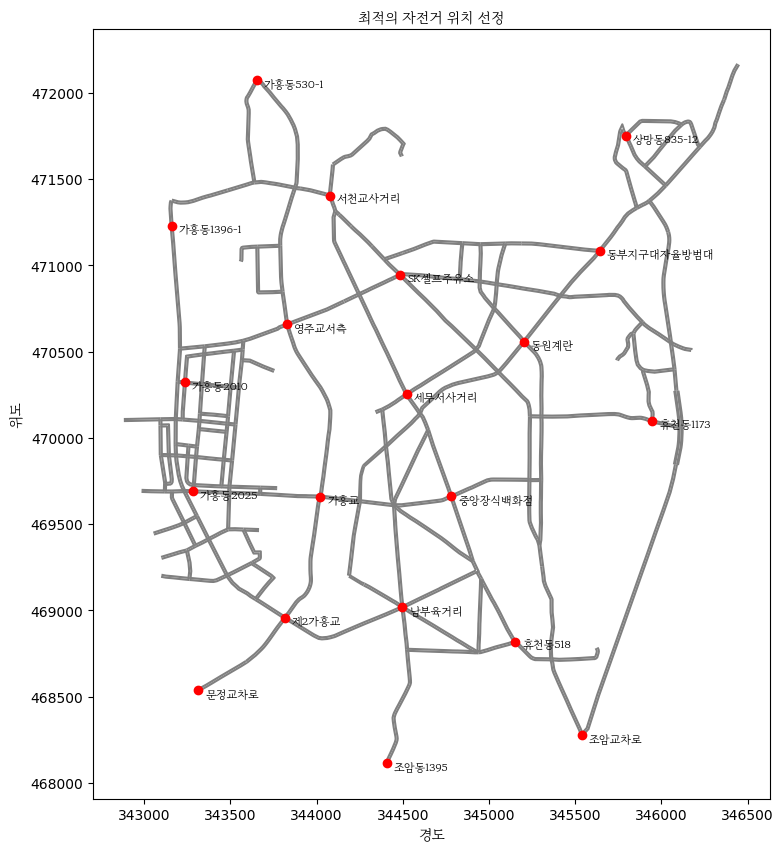

In [ ]:
import matplotlib.font_manager as fm

#한글 깨져서 폰트 설정
path = '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/MaruBuri-Regular.ttf'
fontprop = fm.FontProperties(fname=path)

# Get the coordinates and names of the optimal locations
optimal_locations_coords = [graph.nodes[node_id]['geometry'].coords[0] for node_id in optimal_locations]
optimal_locations_names = [graph.nodes[node_id]['name'] for node_id in optimal_locations]

fig, ax = plt.subplots(figsize=(10, 10))
links_df = gpd.read_file(link_shp, encoding='cp949')
links_df.plot(ax=ax, color='gray')

# Plot the optimal locations with markers and labels
for coord, name in zip(optimal_locations_coords, optimal_locations_names):
    x, y = round(coord[0], 5), round(coord[1], 5)
    ax.scatter(x, y, c='red', zorder=3)
    ax.annotate(name, (x, y), xytext=(5, -5),
                textcoords='offset points', fontsize=8, fontproperties=fontprop)

ax.set_xlabel('경도', fontproperties=fontprop)
ax.set_ylabel('위도', fontproperties=fontprop)
ax.set_title('최적의 자전거 위치 선정', fontproperties=fontprop)

plt.show()


# 주석처리 코드

In [ ]:
'''
def load_networkx_from_shapefiles(node_shp, link_shp):
  """
  Loads a networkx graph from node and link shapefiles.

  Args:
    node_shp: Path to the node shapefile.
    link_shp: Path to the link shapefile.

  Returns:
    A networkx graph.
  """

  # Load the node and link dataframes
  nodes_df = gpd.read_file(node_shp, encoding='cp949')
  links_df = gpd.read_file(link_shp, encoding='cp949')
  print(nodes_df.head(5))
  print(links_df.head(5))

  # Create the graph
  graph = nx.Graph()

  # Add nodes to the graph
  for _, row in nodes_df.iterrows():
    node_id = row['NODE_ID']
    node_geom = row['geometry']
    node_name = row['NODE_NAME']
    graph.add_node(node_id, geometry=node_geom, name=node_name)

  # Add edges to the graph
  for _, row in links_df.iterrows():
    start_node_id = row['F_NODE']
    end_node_id = row['T_NODE']
    edge_geom = row['geometry']
    road_name = row['ROAD_NAME']
    graph.add_edge(start_node_id, end_node_id, geometry=edge_geom, road_name=road_name)

  return graph

# Example usage
node_shp = '/content/drive/MyDrive/shp2/EditNode.shp'
link_shp = '/content/drive/MyDrive/shp2/EditLink.shp'
graph = load_networkx_from_shapefiles(node_shp, link_shp)

In [ ]:
'''
#closeness_centrality를 통해 최적의 자전거 보관함 10곳을 선정

import networkx as nx
import geopandas as gpd

def find_optimal_bike_storage_locations(graph, num_locations):
  """
  Finds the optimal locations for bike storage facilities using closeness centrality.

  Args:
    graph: A networkx graph.
    num_locations: The number of optimal locations to find.

  Returns:
    A list of node IDs for the optimal locations.
  """

  # 각각의 노드를 알고리즘으로 계산
  closeness_centrality = nx.closeness_centrality(graph)

  # 코드의 노드를 알고리즘에 의해 내림차순
  sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

  # N가지의 최적의 후보 선정
  optimal_locations = [node_id for node_id, _ in sorted_nodes[:num_locations]]

  return optimal_locations, closeness_centrality

# 객체화
optimal_locations, closeness_centrality = find_optimal_bike_storage_locations(graph, 10)

# 최적의 위치 출력
print("최적의 자전거 보관함 위치:")
for node_id in optimal_locations:
  node = graph.nodes[node_id]
  print(f"- Node: {node_id}, Closeness Centrality: {closeness_centrality[node_id]}, Node Name: {node['name']}")
del node

In [ ]:
'''
# Loads 쉐이프파일
node_shp = '/content/drive/MyDrive/shp2/EditNode.shp'
link_shp = '/content/drive/MyDrive/shp2/EditLink.shp'

# GDF로 읽기
nodes_df = gpd.read_file(node_shp, encoding='cp949')
links_df = gpd.read_file(link_shp, encoding='cp949')

# fig, ax 만들기
fig, ax = plt.subplots(figsize=(10, 10))

# 링크 플롯
# 노드 플롯
links_df.plot(ax=ax, color='blue', linewidth=2)
nodes_df.plot(ax=ax, color='red', markersize=10)



# 최대 정하기
ax.set_xlim(nodes_df.geometry.x.min(), nodes_df.geometry.x.max())
ax.set_ylim(nodes_df.geometry.y.min(), nodes_df.geometry.y.max())

# 플롯 띄우기
plt.show()
'''

# 통반 파일 딕셔너리화

In [ ]:
import pandas as pd

def read_xlsx_to_dict(xlsx_file, sheet_names):
    """
    Reads an Excel file and returns a dictionary of dictionaries.
    Args:
        xlsx_file (str): Path to the Excel file.
        sheet_names (list): List of sheet names to read.
    Returns:
        dict: A dictionary of dictionaries, with the sheet names as keys,
              and row indices concatenated with '통' as keys in the nested dictionaries,
              containing the data from the first column, starting from the first row.
    """
    data_dict = {}

    for sheet_name in sheet_names:
        df = pd.read_excel(xlsx_file, sheet_name=sheet_name, header=None)
        sheet_dict = {}
        for i, row in df.iterrows():
            sheet_dict[f"{i+1}통"] = row.iloc[0]  # 첫 번째 열의 데이터
        data_dict[sheet_name] = sheet_dict

    return data_dict

sheet_names = ['상망동', '하망동', '영주1동', '영주2동', '휴천1동', '휴천2동', '휴천3동', '가흥1동', '가흥2동']
xlsx_file = '/content/drive/MyDrive/shp2/leetong.xlsx'
data_dict = read_xlsx_to_dict(xlsx_file, sheet_names)

# Print the data dictionary
for sheet_name, sheet_dict in data_dict.items():
    print(f"{sheet_name}:")
    for row_index, row_data in sheet_dict.items():
        print(f"  {row_index}: {row_data}")
    print("\n")
'''
print(df.iterrows())
for i, j in df.iterrows():
  print(j)
'''
# Print the data dictionary as a matrix
'''
for sheet_name, df in data_dict.items():
    print(f"Sheet: {sheet_name}")
    print(df.to_string())
    print("\n")
'''

상망동:
  1통: 840∼840-1, 845∼847, 849-1∼851
840(4∼11), 848 
836, 837(4, 5, 7∼11, 20)
841
835, 837(2, 6, 14∼18), 849 
  2통: 634∼644, 648
618, 645∼647, 666∼691, 822∼832, 산70, 산76∼77
571∼573, 589, 852, 859∼861, 산1, 산2, (1, 2, 8∼11, 15), 산6-3 
534∼546, 591∼617, 산9∼11
  3통: 694∼731, 740∼754, 790∼800, 산73∼74 
344∼388, 769∼788, 산57, 산62∼67 
396∼422, 733∼734, 764, 산49∼51
445∼451
  4통: 242∼256, 430∼441, 468∼523, 산45-2
123∼162, 317∼341, 산45-3 
100∼115, 173∼193
1∼96, 199∼225, 259∼264, 산19, 산27
  5통: 조와동 1∼146, 238
조와동 154∼161, 202∼204
조와동 180∼191, 386∼404
조와동 218∼234, 248∼358, 598
  6통: 조와동 459∼490, 502-1, 504, 525, 산40∼82
조와동 424∼458, 494, 502-3, 519∼524
조와동 544∼560, 산5
  7통: 645-4(장미마을아파트101동 1∼6라인), 645-6(상가)
645-4(장미마을아파트101동 7∼11라인)
645-4(장미마을아파트102동 1∼6라인)
645-4(장미마을아파트102동 7∼11라인)
  8통: 하망동 140, 141(3∼5, 8, 15, 24), 142-2
하망동 138(2, 5∼8, 10∼17, 20), 139-3, 141-6
하망동 116-1, 122(6, 8), 123-11, 131-1, 132, 133(4∼5, 11, 13, 16, 19), 134, 135, 135-1, 138, 139 
하망동 136, 137, 137(1, 3, 5∼12, 16, 18,

'\nfor sheet_name, df in data_dict.items():\n    print(f"Sheet: {sheet_name}")\n    print(df.to_string())\n    print("\n")\n'

# 개행문자 삭제 및 여러 작업

In [ ]:
def remove_escape_sequences(data_dict):
  """
  개행문자 삭제

  반환값:
    dict: 개행문자 제거된 딕셔너리
  """

  for sheet_name, sheet_dict in data_dict.items():
    for row_index, row_data in sheet_dict.items():
      data_dict[sheet_name][row_index] = row_data.replace('\n', ',')

  return data_dict

data_dict = remove_escape_sequences(data_dict)

# Print the data dictionary
for sheet_name, sheet_dict in data_dict.items():
    print(f"{sheet_name}:")
    for row_index, row_data in sheet_dict.items():
        print(f"  {row_index}: {row_data}")
    print("\n")

상망동:
  1통: 840∼840-1, 845∼847, 849-1∼851,840(4∼11), 848 ,836, 837(4, 5, 7∼11, 20),841,835, 837(2, 6, 14∼18), 849 
  2통: 634∼644, 648,618, 645∼647, 666∼691, 822∼832, 산70, 산76∼77,571∼573, 589, 852, 859∼861, 산1, 산2, (1, 2, 8∼11, 15), 산6-3 ,534∼546, 591∼617, 산9∼11
  3통: 694∼731, 740∼754, 790∼800, 산73∼74 ,344∼388, 769∼788, 산57, 산62∼67 ,396∼422, 733∼734, 764, 산49∼51,445∼451
  4통: 242∼256, 430∼441, 468∼523, 산45-2,123∼162, 317∼341, 산45-3 ,100∼115, 173∼193,1∼96, 199∼225, 259∼264, 산19, 산27
  5통: 조와동 1∼146, 238,조와동 154∼161, 202∼204,조와동 180∼191, 386∼404,조와동 218∼234, 248∼358, 598
  6통: 조와동 459∼490, 502-1, 504, 525, 산40∼82,조와동 424∼458, 494, 502-3, 519∼524,조와동 544∼560, 산5
  7통: 645-4(장미마을아파트101동 1∼6라인), 645-6(상가),645-4(장미마을아파트101동 7∼11라인),645-4(장미마을아파트102동 1∼6라인),645-4(장미마을아파트102동 7∼11라인)
  8통: 하망동 140, 141(3∼5, 8, 15, 24), 142-2,하망동 138(2, 5∼8, 10∼17, 20), 139-3, 141-6,하망동 116-1, 122(6, 8), 123-11, 131-1, 132, 133(4∼5, 11, 13, 16, 19), 134, 135, 135-1, 138, 139 ,하망동 136, 137, 137(1, 3, 5∼12, 16, 18,

In [ ]:
import json
with open('/content/asdfff.json', 'w') as f :
  print(json.dumps(data_dict,ensure_ascii=False, indent=4))

# 공백문자 제거

In [ ]:
#https://kimdoky.github.io/tech/2017/05/06/regular/

# 스플릿

In [ ]:
import re

def split_values(nested_dict):
    result = {}
    for key, value in nested_dict.items():
        if isinstance(value, dict):
            result[key] = split_values(value)
        else:
            pattern = r"(?:([^,()]+)\(([^()]*)\))|([^,()]+)"
            tokens = re.findall(pattern, value)
            result[key] = [f"{prefix}({paren})" if paren else token for prefix, paren, token in tokens]
    return result

converted_dict = split_values(data_dict)

#print(converted_dict)
for sheet_name, sheet_dict in converted_dict.items():
    print(f"{sheet_name}:")
    for row_index, row_data in sheet_dict.items():
        print(f"  {row_index}: {row_data}")
    print("\n")

In [ ]:
import re

string = '215, 216, 1381(66∼72, 171, 214∼219, 224, 225, 318~320, 365, 379, 401, 455, 456, 645∼651, 659∼661, 702, 709, 718),1470,1471(1∼9, 27∼29), 1473(1∼3, 5∼9, 12) ,1473(4, 10, 11, 13∼18), 1474,1467,1471(10∼26)'
pattern = r'(?:\d+\([^)]*\)|\d+)'

matches = re.findall(pattern, string)
print(matches)

['215', '216', '1381(66∼72, 171, 214∼219, 224, 225, 318~320, 365, 379, 401, 455, 456, 645∼651, 659∼661, 702, 709, 718)', '1470', '1471(1∼9, 27∼29)', '1473(1∼3, 5∼9, 12)', '1473(4, 10, 11, 13∼18)', '1474', '1467', '1471(10∼26)']


In [ ]:
import re

string = '215, 216, 1381(66∼72, 171, 214∼219, 224, 225, 318~320, 365, 379, 401, 455, 456, 645∼651, 659∼661, 702, 709, 718),1470,1471(1∼9, 27∼29), 1473(1∼3, 5∼9, 12) ,1473(4, 10, 11, 13∼18), 1474,1467,1471(10∼26)'

def expand_ranges(s, prefix):
    result = []
    parts = s.split(',')
    for part in parts:
        if '∼' in part:
            start, end = [int(x) if x else 0 for x in part.split('∼')]
            result.extend([f'{prefix}-{i}' for i in range(start, end+1)])
        else:
            result.append(f'{prefix}-{part.strip()}')
    return result

matches = re.findall(r'\d+\([^)]*\)|\d+', string)
result = []
for match in matches:
    if '(' in match:
        num, ranges = match.split('(')
        prefix = num
        result.extend(expand_ranges(ranges[:-1], prefix))
    else:
        result.append(match)

print(result)

['215', '216', '1381-66', '1381-67', '1381-68', '1381-69', '1381-70', '1381-71', '1381-72', '1381-171', '1381-214', '1381-215', '1381-216', '1381-217', '1381-218', '1381-219', '1381-224', '1381-225', '1381-318~320', '1381-365', '1381-379', '1381-401', '1381-455', '1381-456', '1381-645', '1381-646', '1381-647', '1381-648', '1381-649', '1381-650', '1381-651', '1381-659', '1381-660', '1381-661', '1381-702', '1381-709', '1381-718', '1470', '1471-1', '1471-2', '1471-3', '1471-4', '1471-5', '1471-6', '1471-7', '1471-8', '1471-9', '1471-27', '1471-28', '1471-29', '1473-1', '1473-2', '1473-3', '1473-5', '1473-6', '1473-7', '1473-8', '1473-9', '1473-12', '1473-4', '1473-10', '1473-11', '1473-13', '1473-14', '1473-15', '1473-16', '1473-17', '1473-18', '1474', '1467', '1471-10', '1471-11', '1471-12', '1471-13', '1471-14', '1471-15', '1471-16', '1471-17', '1471-18', '1471-19', '1471-20', '1471-21', '1471-22', '1471-23', '1471-24', '1471-25', '1471-26']


In [ ]:
import re

string = '고현동 413∼416, 421-1∼443 ,고현동 406, 418∼421,고현동 248∼272, 305, 412, 417, 산5, 산7,고현동 281∼290, 산7 ,고현동 107∼133, 220-2∼233, 산9∼22'

matches = re.findall(r'(?:[가-힣]*\s*[^가-힣,\s]*)', string)
result = []
for match1 in matches
  asdf
print(result)

['고현동 413∼416', '', ' 421-1∼443', ' ', '', '고현동 406', '', ' 418∼421', '', '고현동 248∼272', '', ' 305', '', ' 412', '', ' 417', '', ' ', '산5', '', ' ', '산7', '', '고현동 281∼290', '', ' ', '산7', ' ', '', '고현동 107∼133', '', ' 220-2∼233', '', ' ', '산9∼22', '']
[]


# 검증

In [ ]:
population_data = {
    '상망동': 7174,
    '하망동': 5854,
    '영주1동': 3603,
    '영주2동': 4584,
    '휴천1동': 6246,
    '휴천2동': 9698,
    '휴천3동': 7229,
    '가흥1동': 15408,
    '가흥2동': 10248,
    'total': 70044
}
population_value = {
}

In [ ]:
import random
import networkx as nx
from shapely.geometry import Point
import math


def simulate_travel(graph, optimal_locations, num_people, min_distance, max_distance, bicycle_usage_rate):
    """
        bicycle_usage_rate: 자전거 보관함 만나면 타는 확률.

        리턴:
        자전거 탄 사람들과 안타는 사람의 평균 시간값을 튜플로 반환
    """
    cyclist_times = []
    non_cyclist_times = []

    # Set the travel speeds (in meters per second)
    cyclist_speed = 13 * 1000 / 3600  # 13 km/h
    walking_speed = 4 * 1000 / 3600   # 4 km/h

    for _ in range(num_people):
        # Select a random start node
        start_node = random.choice(list(graph.nodes))
        start_geom = graph.nodes[start_node]['geometry']

        # Select a random end node at least min_distance away
        end_node = None
        while end_node is None:
            candidate_node = random.choice(list(graph.nodes))
            candidate_geom = graph.nodes[candidate_node]['geometry']
            if start_geom.distance(candidate_geom) >= min_distance:
                end_node = candidate_node
            if start_geom.distance(candidate_geom) <= max_distance:
                end_node = candidate_node

        # Find the shortest path between start and end nodes
        shortest_path = nx.shortest_path(graph, source=start_node, target=end_node, weight='length')
        #간단한 코드
        point = (shortest_path[0], shortest_path[-1])
        nearest_optimal_locations = find_nearest_optimal_node(graph,optimal_locations, point)

        used_bicycle = False
        # Check if any optimal bicycle locker location is on the shortest path
        for i in range(len(shortest_path) - 1):
            start_node_id = shortest_path[i]
            end_node_id = shortest_path[i + 1]
            if start_node_id in optimal_locations or end_node_id in optimal_locations:
              used_bicycle = True
              break
        # Calculate travel time
        travel_distance = sum(graph.edges[start_node_id, end_node_id]['geometry'].length for start_node_id, end_node_id in zip(shortest_path[:-1], shortest_path[1:]))
        if used_bicycle:
            travel_time = travel_distance / cyclist_speed
            cyclist_times.append(travel_time / 60)  # Convert to minutes
        else:
            travel_time = travel_distance / walking_speed
            non_cyclist_times.append(travel_time / 60)  # Convert to minutes

    avg_cyclist_time = sum(cyclist_times) / len(cyclist_times) if cyclist_times else 0
    avg_non_cyclist_time = sum(non_cyclist_times) / len(non_cyclist_times) if non_cyclist_times else 0

    return avg_cyclist_time, avg_non_cyclist_time

# ... (load the graph and find optimal locations as before)
# 평균 거리 출력하기
def find_nearest_optimal_node(G, optimal_locations, point):
  """
    주어진 지점에서 가장 가까운 optimal_locations의 노드를 찾습니다.

    Args:
        G (networkx.Graph): 네트워크 그래프
        optimal_locations (list): 최적 위치 노드 ID 리스트
        point (tuple): 지점의 좌표 (x, y)

    Returns:
        nearest_node: 가장 가까운 최적 위치 노드의 ID
  """
  point_geom = Point(point)
  max_distance = 500
  nearest_node = None

  for node_id in optimal_locations:
    node_geom = G.nodes[node_id]['geometry']
    distance = point_geom.distance(node_geom)
    if distance > max_distance:
      min_distance = distance
      nearest_node = node_id

  return nearest_node
'''
def find_nearest_optimal_node_2(G, optimal_locations, point):
  """
  Finds the nearest optimal location node to a given point.

  Args:
      G: A networkx graph.
      optimal_locations: A list of node IDs for the optimal bicycle locker locations.
      point: The node ID of the given point.

  Returns:
        The ID of the nearest optimal location node.
  """

  point_geom = Point(graph.nodes[point]['geometry'].coords)  # Convert node ID to coordinates
  min_distance = float('inf')
  nearest_node = None

  for optimal_node in optimal_locations:
      optimal_geom = graph.nodes[optimal_node]['geometry']
      distance = point_geom.distance(optimal_geom)
      if distance < min_distance:
          min_distance = distance
          nearest_node = optimal_node

  return nearest_node
'''


avg_cyclist_time, avg_non_cyclist_time= simulate_travel(graph, optimal_locations, 10000, 1000, 10000, 0.1)
print(f"Average travel time for cyclists: {math.ceil(avg_cyclist_time)} minutes")
print(f"Average travel time for non-cyclists: {math.ceil(avg_non_cyclist_time)} minutes")

In [ ]:
import matplotlib.pyplot as plt

def plot_simulate_travel_results_with_specific_x_axis(bicycle_usage_rates, simulation_results, min_usage_rate=0.0, max_usage_rate=1.0, step=0.01):

  cyclist_times = [result[0] for result in simulation_results]
  non_cyclist_times = [result[1] for result in simulation_results]

    # Generate specific x-axis values
  specific_usage_rates = [usage_rate / 100 for usage_rate in range(int(min_usage_rate * 100), int(max_usage_rate * 100) + 1, int(step * 100))]

  plt.figure(figsize=(10,3))
  plt.plot(specific_usage_rates, cyclist_times[:len(specific_usage_rates)], label='Cyclists', marker='o', color='royalblue')
  plt.plot(specific_usage_rates, non_cyclist_times[:len(specific_usage_rates)], label='Non-Cyclists', marker='s', color='lightcoral')
  plt.xlabel('Bicycle Usage Rate')
  plt.ylabel('Average Travel Time (minutes)')
  plt.title('Impact of Bicycle Usage Rate on Travel Time')
  plt.legend()
  plt.grid(axis='both', linestyle='--', alpha=0.7)
  plt.xticks(specific_usage_rates)

  plt.tight_layout()
  plt.show()


num_people = 200
min_distance = 1000
max_distance = 10000

# Simulate travel for different bicycle usage rates
bicycle_usage_rates = [usage_rate for usage_rate in range(0, 101, 1)]  # Generate usage rates from 0 to 1 with 0.01 step
simulation_results = []
for usage_rate in bicycle_usage_rates:
  usage_rate = usage_rate
  simulation_results.append(simulate_travel(graph, optimal_locations, num_people, min_distance, max_distance, usage_rate))

plot_simulate_travel_results_with_specific_x_axis(bicycle_usage_rates, simulation_results, min_usage_rate=0.0, max_usage_rate=1, step=0.05)


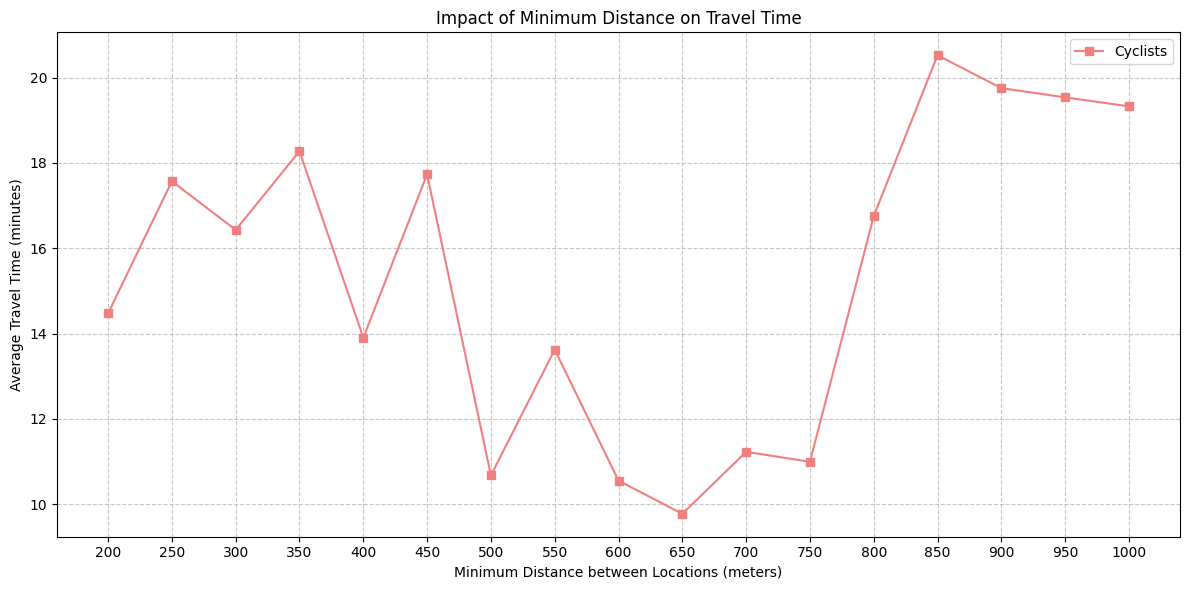

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import

# Define simulation parameters
num_people = 1000
bicycle_usage_rate = 0.5
min_distances = np.arange(200, 1001, 50)  # Range of min_distances to evaluate

# Simulate travel for different min_distances
cyclist_times = []
non_cyclist_times = []
for min_distance in min_distances:
  optimal_locations, _ = find_optimal_bike_storage_locations_c(graph, 20, min_distance)
  avg_cyclist_time, avg_non_cyclist_time = simulate_travel(graph, optimal_locations, num_people, 1000, 10000, bicycle_usage_rate)
  cyclist_times.append(avg_cyclist_time)
  non_cyclist_times.append(avg_non_cyclist_time)

# Plot the results
plt.figure(figsize=(12, 6))
#plt.plot(min_distances, cyclist_times, label='Cyclists', marker='o', color='royalblue')
plt.plot(min_distances, non_cyclist_times, label='Cyclists', marker='s', color='lightcoral')
plt.xlabel('Minimum Distance between Locations (meters)')
plt.ylabel('Average Travel Time (minutes)')
plt.title('Impact of Minimum Distance on Travel Time')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(min_distances)  # Set custom x-axis ticks
plt.tight_layout()
plt.show()

In [ ]:
import random
import networkx as nx

def simulate_trips(graph, optimal_locations, walking_speed = 1, biking_speed = 4, num_trips=5000, min_dist=1000, max_dist=10000, skip_dist=500):
    """
    그래프에서 무작위 시작 노드에서 무작위 도착 노드로 가는 여행을 시뮬레이션
    자전거 보관함 사용 여부를 고려하여 더 빠른 경로를 선택함.

    매개변수:
        graph: NetworkX 그래프.
        optimal_locations: 최적의 자전거 보관함 위치 노드 ID 리스트.
        walking_speed: 걷기 속도 (미터/초).
        biking_speed: 자전거 타기 속도 (미터/초).
        num_trips: 시뮬레이션할 여행 수 (기본값: 1000).
        min_dist: 시작 노드와 도착 노드 간 최소 거리 (미터, 기본값: 1000).
        max_dist: 시작 노드와 도착 노드 간 최대 거리 (미터, 기본값: 3000).
        skip_dist: 자전거 보관함 사용을 건너뛸 최대 거리 (미터, 기본값: 500).

    리턴:
        두 개의 총 소요 시간:
            - total_time_with_lockers: 자전거 보관함을 사용한 경우의 총 소요 시간.
            - total_time_without_lockers: 자전거 보관함을 사용하지 않은 경우의 총 소요 시간.
    """
    total_time_with_lockers = 0
    total_time_without_lockers = 0
    using_bike_people = 0
    walking_people =0
    walker_dist = 0
    biker_dist = 0

    for _ in range(num_trips):
        # 무작위 시작 노드 선택
        start_node = random.choice(list(graph.nodes))
        start_geom = graph.nodes[start_node]['geometry']

        # 거리 범위 내에서 무작위 도착 노드 선택
        end_node = None
        while end_node is None:
            candidate_node = random.choice(list(graph.nodes))
            candidate_geom = graph.nodes[candidate_node]['geometry']
            distance = start_geom.distance(candidate_geom)
            if min_dist <= distance <= max_dist and candidate_node != start_node:
                end_node = candidate_node

        # 자전거 보관함을 사용하지 않는 경우의 최단 경로 계산
        shortest_path_length, _ = nx.single_source_dijkstra(graph, start_node, end_node, weight='length')
        time_without_lockers = shortest_path_length / walking_speed
        total_time_without_lockers += time_without_lockers

        # 가장 가까운 자전거 보관함 찾기 및 해당 경로의 소요 시간 계산
        nearest_locker = min(optimal_locations, key=lambda locker: graph.nodes[start_node]['geometry'].distance(graph.nodes[locker]['geometry']))
        locker_dist = graph.nodes[start_node]['geometry'].distance(graph.nodes[nearest_locker]['geometry'])
        dest_dist, _ = nx.single_source_dijkstra(graph, nearest_locker, end_node, weight='length')

        if locker_dist + dest_dist <= skip_dist:
            total_time_with_lockers += time_without_lockers
            walking_people += 1
            walker_dist += skip_dist
        else:
            walk_to_locker = locker_dist / walking_speed
            bike_time = dest_dist / biking_speed
            total_time_with_lockers += walk_to_locker + bike_time
            using_bike_people += 1
            biker_dist = locker_dist + dest_dist

    return total_time_with_lockers, total_time_without_lockers, using_bike_people, walking_people, biker_dist, walker_dist

walking_speed = 1.4  # 걷기 속도 1.4 m/s로 설정
biking_speed = 3.8  # 자전거 타기 속도 3.8 m/s로 설정

# 1000개의 여행 시뮬레이션
total_time_with_lockers, total_time_without_lockers, using_bike_peoples, walking_peoples, biker_dists, walker_dists = simulate_trips(graph, optimal_locations)
total_time_with_lockers_avg = total_time_with_lockers / using_bike_peoples
total_time_without_lockers_avg = total_time_without_lockers / walking_peoples
total_time_with_lockers_avg = total_time_with_lockers / using_bike_peoples
total_dist_avg_with_bike = biker_dists / using_bike_peoples
total_dist_avg_without_bike = walker_dists / walking_peoples

# 자전거 보관함 사용이 더 효율적인지 확인
'''
if total_time_with_lockers < total_time_without_lockers:
    print("자전거 보관함 사용이 더 효율적입니다.")
else:
    print("자전거 보관함 미사용이 더 효율적입니다.")
'''
# 결과 출력
print(f"자전거 보관함 사용 시 총 소요 시간: {total_time_with_lockers / 3600:.2f} 시간")
print(f"자전거 보관함 미사용 시 총 소요 시간: {total_time_without_lockers / 3600:.2f} 시간")
print(f"자전거 보관함 사용 시 평균 소요 시간: {total_time_without_lockers_avg / 60:.2f} 분")
print(f"자전거 보관함 미사용 시 평균 소요 시간: {total_time_with_lockers_avg / 60:.2f} 분")
print(f"자전거 이용자 평균 거리: {total_dist_avg_with_bike}m")
print(f"자전거 미이용자 평균 거리: {total_dist_avg_without_bike}m")
print(f"자전거 이용자 총 거리: {biker_dists}m")
print(f"자전거 미이용자 총 거리: {walker_dists}m")
print(f"자전거 보관함 이용객: {using_bike_peoples} 명")
print(f"자전거 보관함 미이용객: {walking_peoples} 명")

In [ ]:
import random
import networkx as nx

def simulate_travels(graph, optimal_locations, walking_speed=1.4, biking_speed=3.8, num_trips=5000, min_trip_distance=1000, max_trip_distance=10000):
  """
  그래프에서 무작위 시작 노드와 도착 노드 간 여행을 시뮬레이션하고,
  자전거 보관함 사용 여부에 따른 효율성을 비교합니다.

  Args:
    graph: NetworkX 그래프.
    optimal_locations: 최적의 자전거 보관함 위치 노드 ID 리스트.
    walking_speed: 걷기 속도 (미터/초, 기본값: 1.4).
    biking_speed: 자전거 타기 속도 (미터/초, 기본값: 3.8).
    num_trips: 시뮬레이션할 여행 수 (기본값: 5000).
    min_trip_distance: 시작 노드와 도착 노드 간 최소 거리 (미터, 기본값: 1000).
    max_trip_distance: 시작 노드와 도착 노드 간 최대 거리 (미터, 기본값: 10000).

  Returns:
    여행 시뮬레이션 결과 튜플:
      - total_time_with_lockers: 자전거 보관함 사용 시 총 소요 시간 (초).
      - total_time_without_lockers: 자전거 보관함 미사용 시 총 소요 시간 (초).
      - using_bike_people: 자전거 보관함을 이용한 사람 수.
      - walking_people: 자전거 보관함을 미사용한 사람 수.
      - biker_dist: 자전거 이용자의 총 이동 거리 (미터).
      - walker_dist: 자전거 미 이용자의 총 이동 거리 (미터).
  """

  total_time_with_lockers = 0
  total_time_without_lockers = 0
  using_bike_people = 0
  walking_people = 0
  biker_dist = 0
  walker_dist = 0

  for _ in range(num_trips):
    # 무작위 시작 노드 선택
    start_node = random.choice(list(graph.nodes))
    start_geom = graph.nodes[start_node]['geometry']

    # 거리 범위 내에서 무작위 도착 노드 선택
    end_node = None
    while end_node is None:
      candidate_node = random.choice(list(graph.nodes))
      candidate_geom = graph.nodes[candidate_node]['geometry']
      distance = start_geom.distance(candidate_geom)
      if min_trip_distance <= distance <= max_trip_distance and candidate_node != start_node:
        end_node = candidate_node

    # 자전거 보관함을 사용하지 않는 경우의 최단 경로 계산
    shortest_path_length, _ = nx.single_source_dijkstra(graph, start_node, end_node, weight='length')
    time_without_lockers = shortest_path_length / walking_speed
    total_time_without_lockers += time_without_lockers

    # 가장 가까운 자전거 보관함 찾기
    nearest_locker = min(optimal_locations, key=lambda locker: graph.nodes[start_node]['geometry'].distance(graph.nodes[locker]['geometry']))
    locker_dist = graph.nodes[start_node]['geometry'].distance(graph.nodes[nearest_locker]['geometry'])

    # 자전거 보관함 사용 여부 판단 (이동 거리 기반)
    if locker_dist < max_trip_distance:  # 최대 이동 거리보다 작으면 자전거 보관함 이용 고려
      dest_dist, _ = nx.single_source_dijkstra(graph, nearest_locker, end_node, weight='length')
      if locker_dist + dest_dist <= min_trip_distance:  # 도착지까지 거리가 너무 가까우면 미 이용
        total_time_with_lockers += time_without_lockers
        walking_people += 1
        walker_dist += min_trip_distance
      else:
        # 자전거 보관함 사용
        walk_to_locker = locker_dist / walking_speed
        bike_time = dest_dist / biking_speed
        total_time_with_lockers += walk_to_locker + bike_time
        using_bike_people += 1
        biker_dist += locker_dist + dest_dist
    else:
      # 최대 이동 거리 초과 시 자전거 보관함 미 이용
      total_time_with_lockers += time_without_lockers
      walking_people += 1
      walker_dist += shortest_path_length

  return total_time_with_lockers, total_time_without_lockers, using_bike_people, walking_people, biker_dist, walker_dist

# 예시 코드 (walking_speed, biking_speed, num_trips 등 값은 사용자 설정으로 변경)
walking_speed = 1.4  # 걷기 속도 1.4 m/s
biking_speed = 3.8  # 자전거 타기 속도 3.8 m/s
num_trips = 5000  # 시뮬레이션할 여행 수

# 시뮬레이션 실행 및 결과 출력
total_time_with_lockers, total_time_without_lockers, using_bike_peoples, walking_peoples, biker_dists, walker_dists = simulate_travels(graph, optimal_locations, walking_speed, biking_speed, num_trips)

total_time_with_lockers_avg = total_time_with_lockers / using_bike_peoples
total_time_without_lockers_avg = total_time_without_lockers / walking_peoples
total_dist_avg_with_bike = biker_dists / using_bike_peoples
total_dist_avg_without_bike = walker_dists / walking_peoples

print("= 자전거 보관함 활용 여행 시뮬레이션 결과 =")
print(f"자전거 보관함 사용 시 총 소요 시간: {total_time_with_lockers / 3600:.2f} 시간")
print(f"자전거 보관함 미사용 시 총 소요 시간: {total_time_without_lockers / 3600:.2f} 시간")
print(f"자전거 보관함 사용 시 평균 소요 시간: {total_time_without_lockers_avg / 60:.2f} 분")
print(f"자전거 보관함 미사용 시 평균 소요 시간: {total_time_with_lockers_avg / 60:.2f} 분")
print(f"자전거 이용자 평균 거리: {total_dist_avg_with_bike:.2f} 미터")
print(f"자전거 미이용자 평균 거리: {total_dist_avg_without_bike:.2f} 미터")
print(f"자전거 이용자 총 거리: {biker_dists} 미터")
print(f"자전거 미이용자 총 거리: {walker_dists} 미터")
print(f"자전거 보관함 이용객: {using_bike_peoples} 명")
print(f"자전거 보관함 미이용객: {walking_peoples} 명")

# QGIS 코드

In [ ]:
from qgis.core import QgsVectorLayer, QgsFeatureRequest, QgsExpression, QgsVectorFileWriter

# 벡터 레이어 불러오기
layer = QgsVectorLayer("C:/Users/rlarb/AppData/Roaming/QGIS/QGIS3/profiles/default/processing/outputs/AL3.shp", "A3", "ogr")

# 필터링할 속성 값 설정
attribute_value = '경상북도 영주시 가흥동'  # 일치시킬 값으로 변경하세요
attribute_name = "A3"  # 필터링할 속성 이름

# 필터 표현식 만들기
expression = QgsExpression(f'"{attribute_name}" = \'{attribute_value}\'')

# 필터링된 객체들 가져오기
request = QgsFeatureRequest(expression)
features = [feat for feat in layer.getFeatures(request)]

# 새로운 shapefile 생성 및 저장
output_file = "C:/output/put.shp"
fields = layer.fields()
writer = QgsVectorFileWriter(output_file, "UTF-8", fields, layer.wkbType(), layer.crs(), "ESRI Shapefile")

for feature in features:
    writer.addFeature(feature)

del writer

print(f"{len(features)} features extracted and saved to {output_file}")

list ' ~ ' in the dictionary data_dict. However, if there is a character, pass it over. (example) : 10(1~5)  -> [10-1, 10-2, 10-3, 10-4, 10-5]